In [20]:
import matplotlib
import  pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import numpy.ma as ma

In [21]:
df =  pd.read_csv(os.getcwd() +"/data/data.csv",index_col=0)

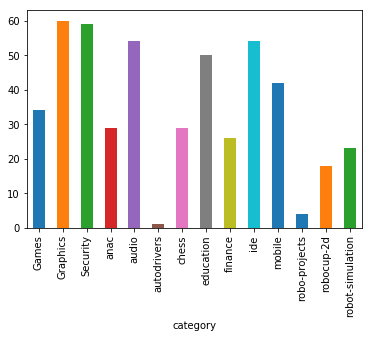

In [22]:
df.groupby('category').count()['type'].plot(kind='bar')

In [23]:
low = .01
high = .97
quant_df = df['analizo_accm_mean'].quantile([low, high])
quant_df

0.01    1.110819
0.97    6.120673
Name: analizo_accm_mean, dtype: float64

In [24]:
df_reduced =df.loc[df['analizo_accm_mean']<=quant_df[high]].copy()


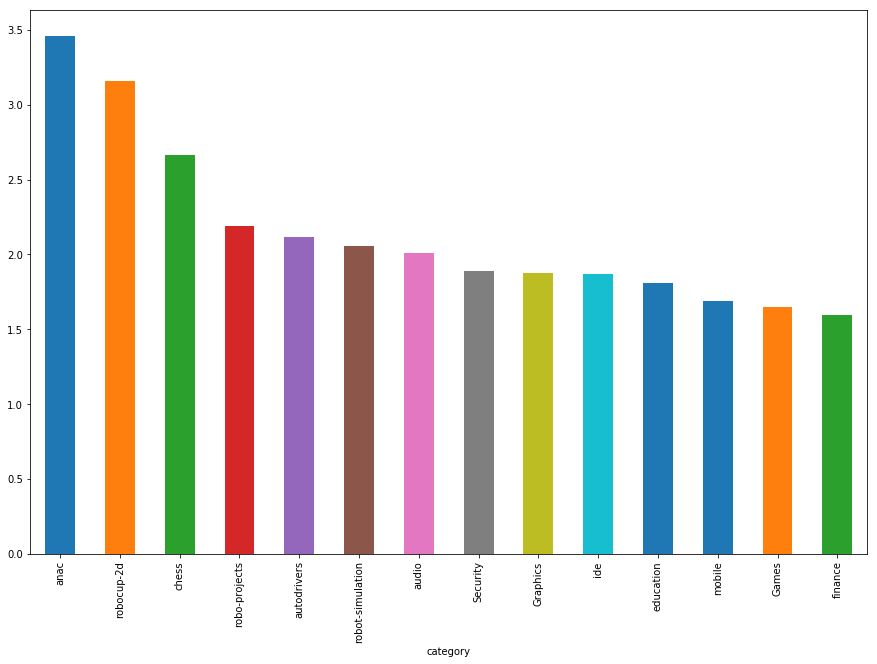

In [25]:
df_reduced.groupby('category').median()['analizo_accm_mean'].sort_values(ascending=False).plot(kind='bar',figsize=(15,10))

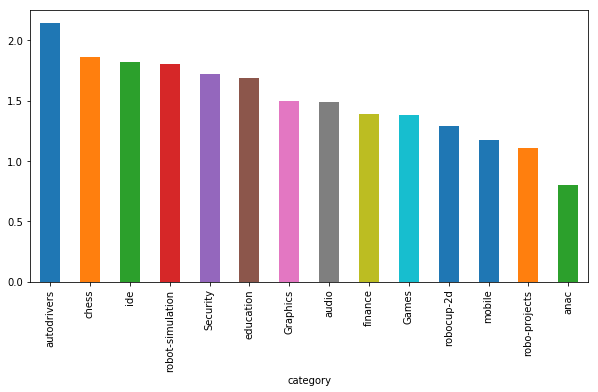

In [26]:
df_reduced.groupby('category').median()['analizo_acc_mean'].sort_values(ascending=False).plot(kind='bar',figsize=(10,5))

In [27]:
from scipy import stats
from operator import itemgetter

In [118]:
diff_vars = []
cat_lst = list(df_reduced[df_reduced['agent_type']=='agent']['category'].unique())
cat_lst.extend(df_reduced[df_reduced['agent_type']=='non-agent']['category'].unique())

In [119]:
variables = list(df_reduced.select_dtypes(include=[np.number]).columns)

In [130]:
diff_vars = {}
rep1= set()
for var in variables:
    ks_stats = []        
    
    for cat in cat_lst:
        rvs2 = df_reduced[(df_reduced['agent_type']=='non-agent')][var]
        rvs1 = df_reduced[df_reduced['category']==cat][var]
        
        p = stats.ks_2samp(rvs1, rvs2)[1]
        if (p<0.005) and (rvs1.mean()>rvs2.mean()):
            ks_stats.append((cat,p))
        if len(ks_stats)>=3:
            
           
            cats , ps = zip(*ks_stats)
            rep1 |= set(cats)
            diff_vars[var] = [list(cats) ,sum(ps) / float(len(ps))]
diff_vars
            #sorted (ks_stats,key=itemgetter(1))
    

{'analizo_accm_mean': [['robocup-2d', 'chess', 'anac'],
  1.2398611202883446e-06],
 'analizo_accm_quantile_median': [['robocup-2d', 'chess', 'anac'],
  0.0006138133868438951],
 'analizo_accm_quantile_upper': [['robocup-2d', 'chess', 'anac'],
  3.8844850547330105e-06],
 'analizo_accm_standard_deviation': [['robocup-2d', 'chess', 'anac'],
  0.0017297165325254882],
 'analizo_amloc_mean': [['robocup-2d', 'chess', 'anac', 'robot-simulation'],
  0.0007270164195806952],
 'analizo_amloc_quantile_lower': [['robocup-2d', 'chess', 'anac'],
  4.5182793047336624e-05],
 'analizo_amloc_quantile_median': [['robocup-2d', 'chess', 'anac'],
  0.0011579320246301284],
 'analizo_amloc_quantile_upper': [['robocup-2d',
   'chess',
   'anac',
   'robot-simulation'],
  0.0002027938713676794],
 'analizo_anpm_quantile_lower': [['robocup-2d', 'anac', 'Graphics'],
  0.0005966723013583219],
 'analizo_loc_mean': [['robocup-2d', 'anac', 'Graphics'],
  0.0015679486177869897],
 'analizo_mmloc_mean': [['robocup-2d', 'che

In [131]:
rep1 =list(rep1)
rep1


['robot-simulation', 'chess', 'Graphics', 'robocup-2d', 'anac']

In [132]:
diff_v = {k[k.find('_')+1:]: [ 1 if r in v[0] else 0 for r in rep1] +[v[1]] for k,v in diff_vars.iteritems()}
diff_v

{'accm_mean': [0, 1, 0, 1, 1, 1.2398611202883446e-06],
 'accm_quantile_median': [0, 1, 0, 1, 1, 0.0006138133868438951],
 'accm_quantile_upper': [0, 1, 0, 1, 1, 3.8844850547330105e-06],
 'accm_standard_deviation': [0, 1, 0, 1, 1, 0.0017297165325254882],
 'amloc_mean': [1, 1, 0, 1, 1, 0.0007270164195806952],
 'amloc_quantile_lower': [0, 1, 0, 1, 1, 4.5182793047336624e-05],
 'amloc_quantile_median': [0, 1, 0, 1, 1, 0.0011579320246301284],
 'amloc_quantile_upper': [1, 1, 0, 1, 1, 0.0002027938713676794],
 'anpm_quantile_lower': [0, 0, 1, 1, 1, 0.0005966723013583219],
 'loc_mean': [0, 0, 1, 1, 1, 0.0015679486177869897],
 'mmloc_mean': [0, 1, 0, 1, 1, 0.001577447211321857],
 'mmloc_quantile_lower': [0, 1, 0, 1, 1, 0.0015414630472675751],
 'mmloc_quantile_median': [0, 1, 0, 1, 1, 0.0004991666387271098],
 'mmloc_quantile_upper': [1, 0, 0, 1, 1, 0.0012375704332796339]}

In [135]:
df =  pd.DataFrame.from_dict(diff_v,orient='index',columns=rep1+['p']).sort_values('p')
df

,robot-simulation,chess,Graphics,robocup-2d,anac,p
accm_mean,0,1,0,1,1,0.000001
accm_quantile_upper,0,1,0,1,1,0.000004
amloc_quantile_lower,0,1,0,1,1,0.000045
amloc_quantile_upper,1,1,0,1,1,0.000203
mmloc_quantile_median,0,1,0,1,1,0.000499
anpm_quantile_lower,0,0,1,1,1,0.000597
accm_quantile_median,0,1,0,1,1,0.000614
amloc_mean,1,1,0,1,1,0.000727
amloc_quantile_median,0,1,0,1,1,0.001158
mmloc_quantile_upper,1,0,0,1,1,0.001238


In [136]:
print(df.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  robot-simulation &  chess &  Graphics &  robocup-2d &  anac &         p \\
\midrule
accm\_mean               &                 0 &      1 &         0 &           1 &     1 &  0.000001 \\
accm\_quantile\_upper     &                 0 &      1 &         0 &           1 &     1 &  0.000004 \\
amloc\_quantile\_lower    &                 0 &      1 &         0 &           1 &     1 &  0.000045 \\
amloc\_quantile\_upper    &                 1 &      1 &         0 &           1 &     1 &  0.000203 \\
mmloc\_quantile\_median   &                 0 &      1 &         0 &           1 &     1 &  0.000499 \\
anpm\_quantile\_lower     &                 0 &      0 &         1 &           1 &     1 &  0.000597 \\
accm\_quantile\_median    &                 0 &      1 &         0 &           1 &     1 &  0.000614 \\
amloc\_mean              &                 1 &      1 &         0 &           1 &     1 &  0.000727 \\
amloc\_quantile\_median   &                 0 

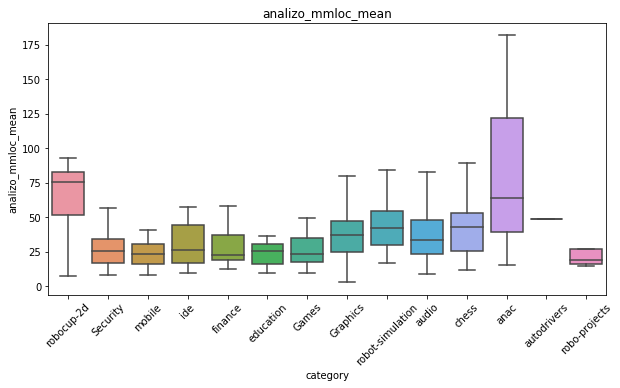

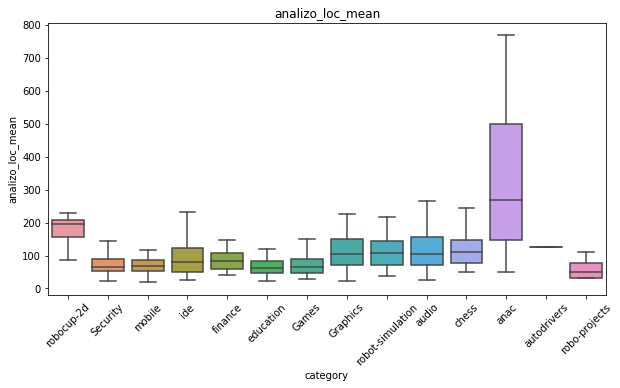

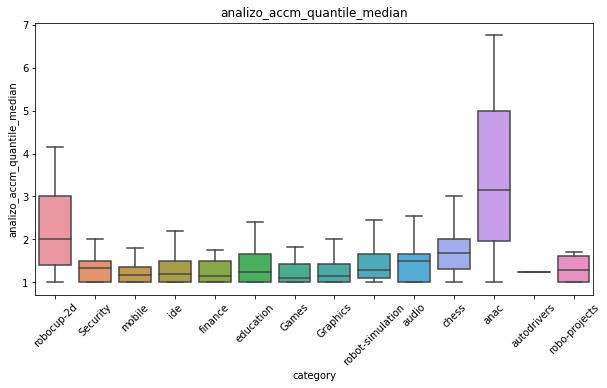

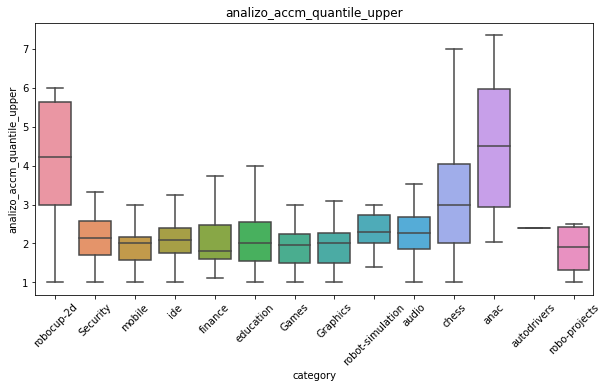

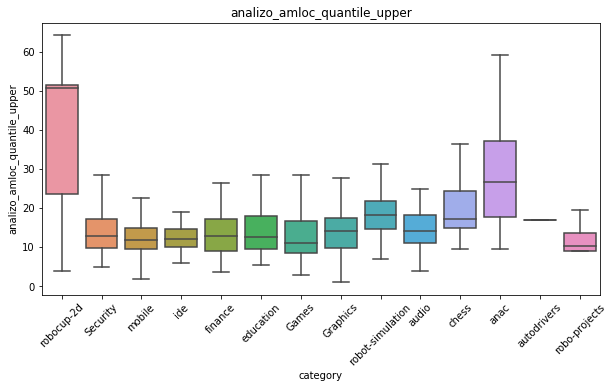

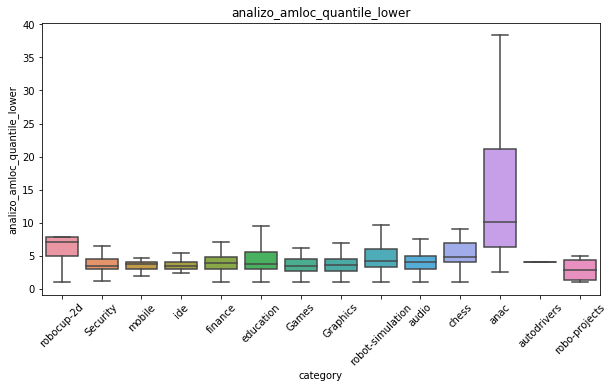

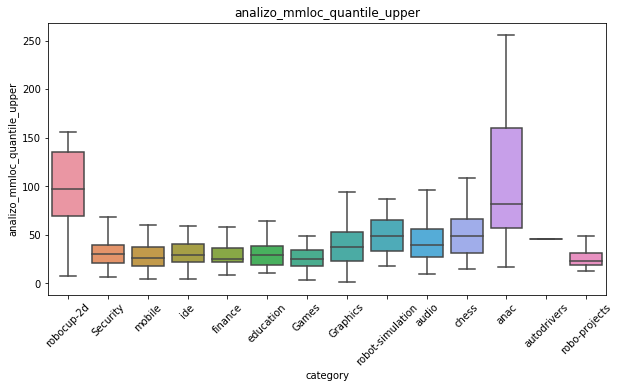

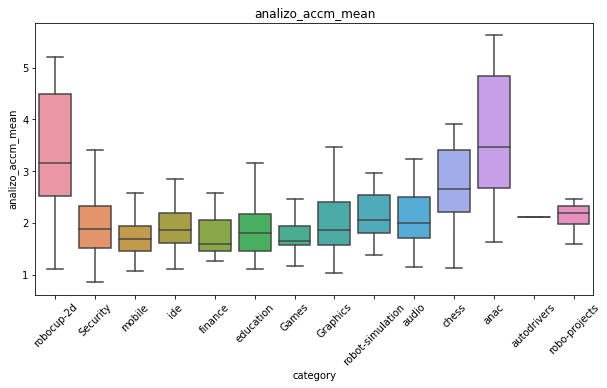

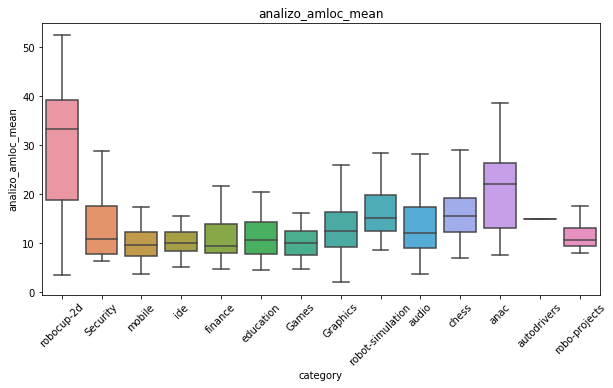

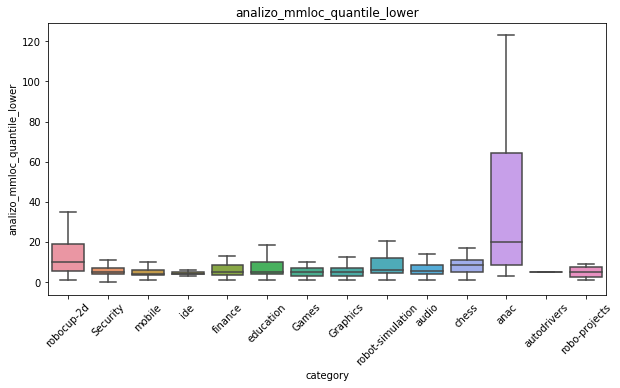

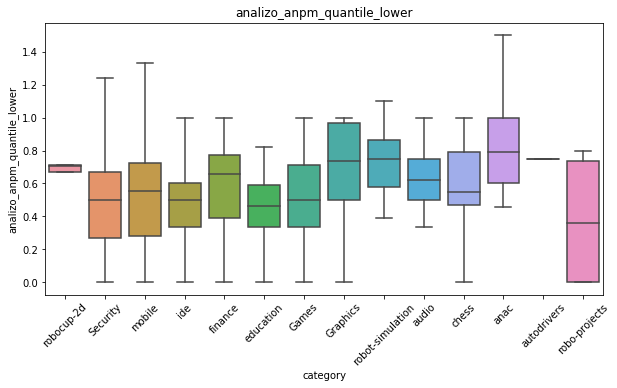

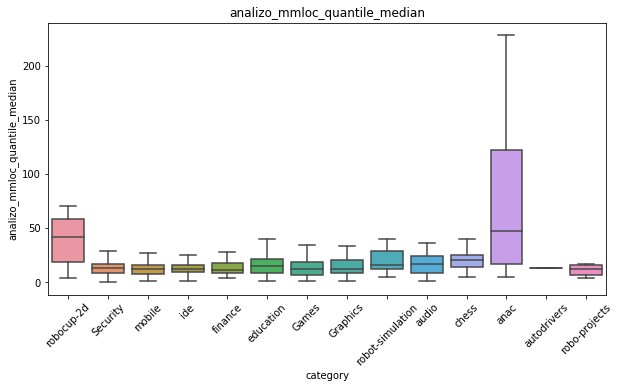

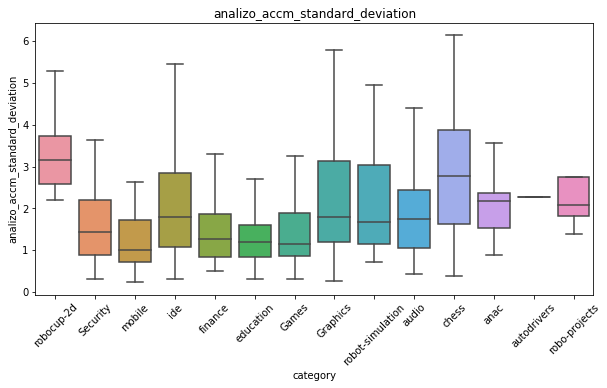

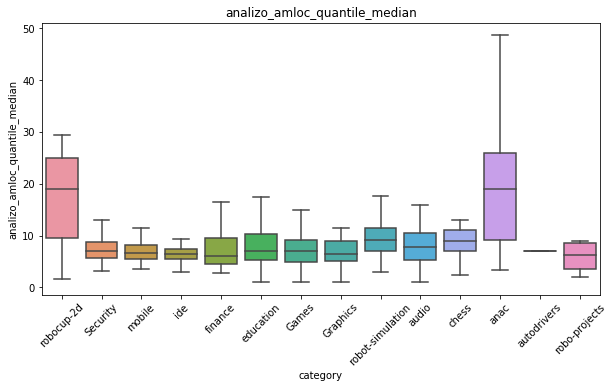

In [146]:
for var in diff_vars:
    
    fix,ax = plt.subplots(figsize=(10,5),)
    sns.boxplot(x='category',y=var,data=df_reduced,showfliers=False).set_title(var)
    #g = sns.swarmplot(x='category',y=var,data=df_reduced,color='black')
    plt.setp(ax.get_xticklabels(), rotation=45)
#     for item in g.get_xticklabels():
#          item.set_rotation(90)
            

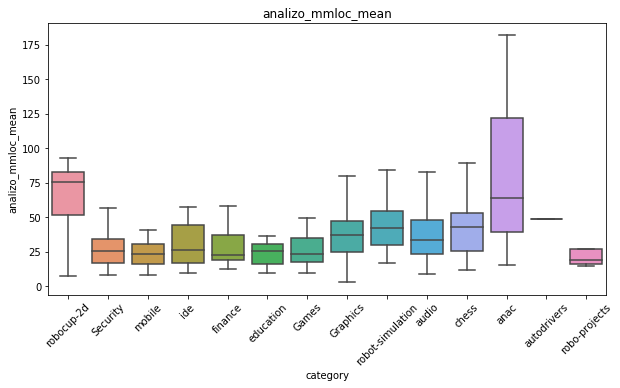

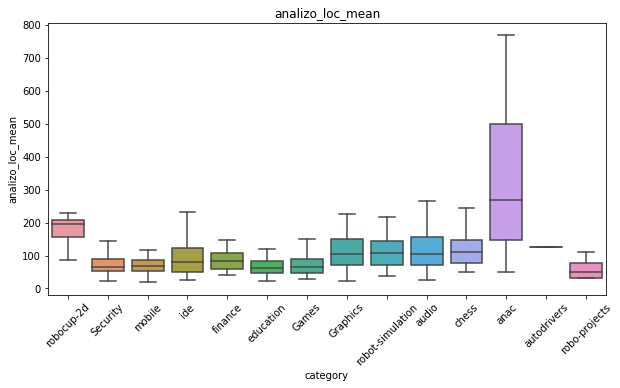

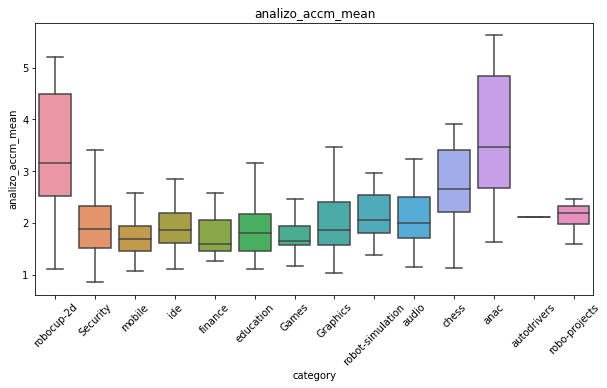

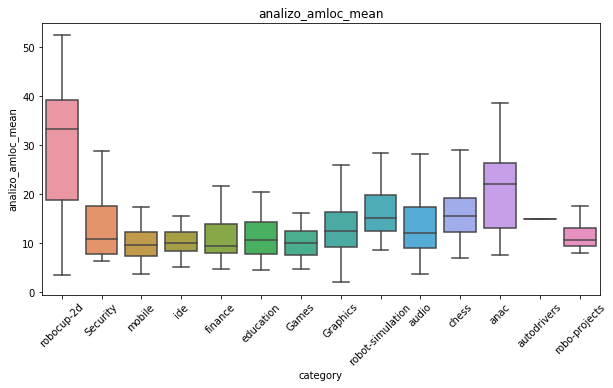

In [159]:
for var in [c for c in diff_vars if 'mean'  in c]:
    
    fix,ax = plt.subplots(figsize=(10,5),)
    sns.boxplot(ax=ax , x='category',y=var,data=df_reduced,showfliers=False).set_title(var)
    #g = sns.swarmplot(x='category',y=var,data=df_reduced,color='black')
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.savefig(var+"_output.png")


In [59]:
df2 =  pd.read_csv(os.getcwd() +"/data/robo-sim-data.csv",index_col=0)

In [60]:
df2 = df2[~df2['McCabes_cyclomatic_complexity'].isnull()].copy()

In [61]:
df2['cc_per_line_of_code'] = df2['McCabes_cyclomatic_complexity'] / df2['analizo_total_loc']

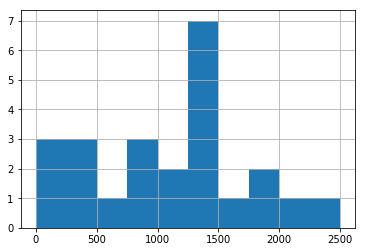

In [62]:
df2['McCabes_cyclomatic_complexity'].hist(range=(0,2500))

(0, 1)

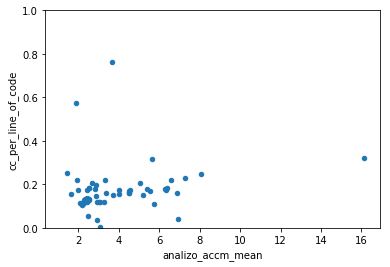

In [64]:
df2.plot.scatter(x='analizo_accm_mean',y='cc_per_line_of_code' )
plt.ylim(0,1)